In [217]:
# import numpy as np
# tmp = np.loadtxt("sepsis_desen.csv", delimiter=",")
import pandas as pd
#utf-8,gbk,gb2312,gb18030,cp935,big5
df=pd.read_csv("sepsis_desen.csv",encoding='gbk')

/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [218]:
# select HR
df_HR=df[df.ExamName=='HR']
# df_HR_health=df_HR_health[pd.isna(df_HR.Diag_Date)]
# df_HR=df_HR[~pd.isna(df_HR.Diag_Date)]

In [219]:
df_HR=df_HR.drop(['ExamName','UNIT','ReferenceData','Date_Birth','Discharge_Date'],1)


In [220]:
import datetime
def period(row):
    if row['Label']==0:
        return (datetime.datetime.strptime(row['DateTime'],'%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(row['Admit_Date'],'%Y-%m-%d %H:%M:%S'))
    else:
        return (datetime.datetime.strptime(row['DateTime'],'%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(row['Diag_Date'],'%Y-%m-%d %H:%M:%S'))
    
df_HR['period'] = df_HR.apply (lambda row: period (row),axis=1)

In [221]:
df_HR=df_HR.drop(['DateTime','Diag_Date','Admit_Date'],1)

In [222]:
def tran(row):
     return row['period']/np.timedelta64(1, 'h')
df_HR['period'] = df_HR.apply (lambda row: tran(row),axis=1)

In [223]:
def compare(row):
    if row['Label']==1 or  row['Label']==2:
        return 1
    else:
        return 0
df_HR['Label'] = df_HR.apply (lambda row: compare(row),axis=1)

In [224]:
Id_HR=df_HR.drop_duplicates(['Inhosp_No'])


/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


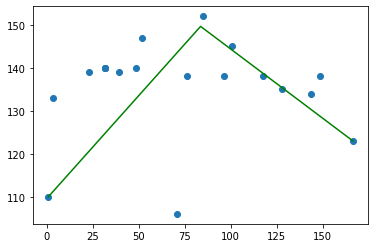

array([0.0786704])

In [225]:

# interpolate
import numpy as np, matplotlib.pyplot as plt
from scipy.interpolate import interp1d #导入scipy里interpolate模块中的interpld插值模块
x= np.array(df_HR.period[df_HR.Inhosp_No==21])
y= np.array(df_HR.Value[df_HR.Inhosp_No==21]) #离散点的分布
j=x.max()-x.min()
j=j/60
count=1
if j<2:
    j=2
    count=60/(x.max()-x.min())
xx = np.linspace(x.min(), x.max(), round(j)) #新的插值区间及其点的个数
plt.scatter(x, y) #散点图
#for n in ['linear','zero', 'slinear', 'quadratic', 'cubic', 4, 5]: #python scipy里面的各种插值函数
f = interp1d(x, y,kind="linear") #编辑插值函数格式
ynew=f(xx) #通过相应的插值函数求得新的函数点
plt.plot(xx,ynew,"g") #输出新的函数点的图像
plt.show()
(np.diff(ynew[::2]) / np.diff(xx[::2]))/count

In [227]:
def lb(row):
    i=row['Inhosp_No']
    x= np.array(df_HR.period[df_HR.Inhosp_No==i])
    y= np.array(df_HR.Value[df_HR.Inhosp_No==i]) #离散点的分布
    if len(x)<2:
        return 0
    j=x.max()-x.min()
    j=j/60
    count=1
    if j<2:
        j=2
        count=60/(x.max()-x.min())
    xx = np.linspace(x.min(), x.max(), int(j)) #新的插值区间及其点的个数
    f = interp1d(x, y,kind="linear") #编辑插值函数格式
    ynew=f(xx)
    if len(xx)>=2:
        return (np.diff(ynew[::1]) / np.diff(xx[::1]))/count
    else:
        return 0

In [228]:
Id_HR['lb']=Id_HR.apply (lambda row: lb(row),axis=1) 

/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
def min_val(row):
    return np.min(row['lb'])
def var_val(row):
    return np.var(row['lb'])

def mean(row):
    return np.mean(row['lb'])
def neo(row):
    return np.min(abs(row['lb']))
Id_HR['var']=Id_HR.apply(lambda row: var_val(row),axis=1)
Id_HR['min']=Id_HR.apply (lambda row: min_val(row),axis=1) 
Id_HR['mean']=Id_HR.apply(lambda row: mean(row),axis=1)
Id_HR['neo']=Id_HR.apply(lambda row: neo(row),axis=1)

In [269]:
df_T=df[df.ExamName=='T']
df_T=df_T.drop(['ExamName','UNIT','ReferenceData','Date_Birth','Discharge_Date'],1)
df_T['period'] = df_T.apply (lambda row: period (row),axis=1)

In [ ]:
df_T=df_T.drop(['DateTime','Diag_Date','Admit_Date'],1)
df_T['period'] = df_T.apply (lambda row: tran(row),axis=1)
df_T['Label'] = df_T.apply (lambda row: compare(row),axis=1)

In [271]:
Id_T=df_T.drop_duplicates(['Inhosp_No'])

In [282]:
df_T=df_T[df_T.Value!=0]

In [339]:
def var_T(row):
    i=row['Inhosp_No']
    x= np.array(df_T.Value[df_T.Inhosp_No==i])
    return np.var(x)
def mean_T(row):
    i=row['Inhosp_No']
    x= np.array(df_T.Value[df_T.Inhosp_No==i])
    return np.mean(x)


Id_T['var_T']=Id_T.apply(lambda row: var_T(row),axis=1)
#Id_T['min']=Id_T.apply (lambda row: min_val(row),axis=1) 
Id_T['mean_T']=Id_T.apply(lambda row: mean_T(row),axis=1)

/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/python/anaco

In [337]:
def max_T(row):
    i=row['Inhosp_No']
    x= np.array(df_T.Value[df_T.Inhosp_No==i])
    b=[37.2]*len(x)
    return np.sum((np.array(x)-np.array(b))>0)
Id_T['max_T']=Id_T.apply(lambda row: max_T(row),axis=1)

/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [365]:
def lbt(row):
    i=row['Inhosp_No']
    x= np.array(df_T.period[df_T.Inhosp_No==i])
    y= np.array(df_T.Value[df_T.Inhosp_No==i]) #离散点的分布
    if len(x)<2:
        return 0
    t=[x<200]
    x=x[t]
    y=y[t]
    z1 = np.polyfit(x, y, 1)  #一次多项式拟合，相当于线性拟合
    p1 = np.poly1d(z1)
    xx = np.linspace(x.min(), x.max(), 2) #新的插值区间及其点的个数
    ynew=p1(xx)
    return (np.diff(ynew[::1]) / np.diff(xx[::1]))
Id_T['min_T']=Id_T.apply(lambda row: float(lbt(row)),axis=1)


/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/home/python/anaconda3/envs/python36/lib/python3.6/s

In [373]:
from pandas import Series,DataFrame,merge
#Id_T=Id_T.drop(['min'],1)
name1=['Inhosp_No','Value','Label','period','lb','var','min','mean','neo']
name2=['Inhosp_No','max_T','var_T','mean_T','min_T']
Id=merge(Id_HR[name1],Id_T[name2],on="Inhosp_No",how="left")
Id

,Inhosp_No,Value,Label,period,lb,var,min,mean,neo,max_T,var_T,mean_T,min_T
0,1,162.0,0,86.857222,"[0.34667038139744005, -0.30082712054908145, 0....",0.029626,-0.300827,-9.675022e-03,0.013199,23,0.619152,36.934862,-6.374491e-03
1,2,124.0,1,254.008889,"[-0.5691373520364622, 0.17657747721324826, 0.2...",0.129924,-0.569137,-1.145264e-01,0.176577,35,0.368242,37.091566,-5.386882e-03
2,3,158.0,1,9.281944,"[-0.4595579191740313, -0.060084451741855824, 0...",0.153124,-0.706992,-6.166016e-02,0.060084,32,0.551882,37.239744,-1.253032e-02
3,4,96.0,0,99.224167,[0.024140861929357802],0.000000,0.024141,2.414086e-02,0.024141,11,0.572050,37.002941,-5.606726e-03
4,5,136.0,0,1.859167,[0.07515265382808829],0.000000,0.075153,7.515265e-02,0.075153,0,0.014539,36.890244,-4.089147e-04
5,6,130.0,0,62.796389,"[-0.02777761689702664, 0.01060671394601618]",0.000368,-0.027778,-8.585451e-03,0.010607,6,0.238452,36.908824,-3.271477e-03
6,7,132.0,0,43.572778,"[0.16503000239647553, -0.03290226333036159, -0...",0.010569,-0.068756,2.112397e-02,0.032902,0,46.434183,34.894737,4.297102e-02
7,8,112.0,0,511.896944,"[-0.20906563564306554, -0.02480860033504006, 0...",0.009617,-0.209066,-2.290241e-02,0.014147,4,0.142537,36.689062,-5.598820e-04
8,9,136.0,0,33.035556,[-0.0497496722839048],0.000000,-0.049750,-4.974967e-02,0.049750,0,0.014529,36.936111,-4.050896e-04
9,10,122.0,0,3.843889,[-0.06666666666666668],0.000000,-0.066667,-6.666667e-02,0.066667,0,0.022500,36.350000,8.641383e-02


In [374]:
import pandas as pd
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score,f1_score
import numpy as np
from sklearn.metrics import *
from sklearn import metrics

# data = data["直接胆红素", "甘油三酯", "抑酶", "总胆汁酸", "抑酶药物", "APTT",
#              "LDH", "年龄", "尿素",
#              "是否有术后胰腺炎"]
names=['period','var','min','mean','neo','max_T','var_T','mean_T','min_T']

x_train, x_test, y_train, y_test = train_test_split(Id[names], Id["Label"], random_state=0)

data_train = xgboost.DMatrix(x_train, y_train)  # 使用XGBoost的原生版本需要对数据进行转化
data_test = xgboost.DMatrix(x_test, y_test)

# param = {'max_depth': 4, 'eta': 0.5, 'objective': 'binary:logistic'}
param={'max_depth':3}
watchlist = [(data_test, 'test'), (data_train, 'train')]
n_round = 20
booster = xgboost.train(param, data_train, num_boost_round=n_round, evals=watchlist)

y_pred = booster.predict(data_test)
y = data_test.get_label()
print(y_pred)
accuracy = sum(y == (y_pred > 0.5))
accuracy_rate = float(accuracy) / len(y_pred)
print('样本总数：{0}'.format(len(y_pred)))
print('正确数目：{0}'.format(accuracy))
print('正确率：{0:.3f}'.format((accuracy_rate)))
print("概率大于0.5的", y_pred[y_pred > 0.5])

y_test_true = y_test.values.tolist()
y_pred_result = [1 if x > 0.5 else 0 for x in y_pred.tolist()]

target_names = ['class 0', 'class 1']
print(classification_report(y_test_true, y_pred_result, target_names=target_names))
print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
Accuracy = accuracy_score(np.array(y_test), y_pred_result )  # 计算准确度
Accuracy = round(Accuracy, 3)
Precision = precision_score(y_test, y_pred_result )  # 计算精确度
Precision = round(Precision, 3)
Recall = recall_score(np.array(y_test), y_pred_result )  # 计算召回率
Recall = round(Recall, 3)
F1 = f1_score(np.array(y_test), y_pred_result )
F1 = round(F1, 3)
matr=metrics.confusion_matrix(y_test, y_pred_result , labels=None, sample_weight=None)
print(Accuracy, Precision, Recall, F1)
print(matr)

/home/python/anaconda3/envs/python36/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	test-rmse:0.414134	train-rmse:0.412622
[1]	test-rmse:0.365418	train-rmse:0.361083
[2]	test-rmse:0.336025	train-rmse:0.32994
[3]	test-rmse:0.320261	train-rmse:0.311675
[4]	test-rmse:0.308761	train-rmse:0.301085
[5]	test-rmse:0.304199	train-rmse:0.293641
[6]	test-rmse:0.300782	train-rmse:0.286959
[7]	test-rmse:0.298415	train-rmse:0.28331
[8]	test-rmse:0.298029	train-rmse:0.279346
[9]	test-rmse:0.298756	train-rmse:0.275874
[10]	test-rmse:0.298094	train-rmse:0.27435
[11]	test-rmse:0.296896	train-rmse:0.271464
[12]	test-rmse:0.297181	train-rmse:0.26869
[13]	test-rmse:0.296863	train-rmse:0.267806
[14]	test-rmse:0.296823	train-rmse:0.264191
[15]	test-rmse:0.297862	train-rmse:0.262197
[16]	test-rmse:0.297796	train-rmse:0.259842
[17]	test-rmse:0.298135	train-rmse:0.258908
[18]	test-rmse:0.298777	train-rmse:0.257478
[19]	test-rmse:0.299422	train-rmse:0.254848
[ 9.39315706e-02  3.60789210e-01 -2.19966797e-03  6.92284644e-01
  5.44809997e-02  1.43382862e-01  9.96337179e-03  4.18864459e-01
  8.